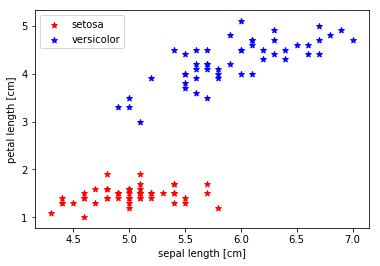

In [15]:
import pandas as pd

#オンライン環境でのみ有効
df = pd.read_csv("https://archive.ics.uci.edu/ml/"
                 "machine-learning-databases/iris/iris.data", header = None)
df.tail()

import matplotlib.pyplot as plt
import numpy as np

#先頭の100標本(setosa&versicolorのクラスラベルを抽出)
y = df.iloc[0:100, 4].values

#Iris-setosaを-1,Iris-versicolorを1に変換(ステップ関数)
y = np.where(y == "Iris-setosa", -1, 1)

#1列目と3列目の特徴量を抽出
X = df.iloc[0:100, [0,2]].values

#setosaを赤の丸、versicolorを青のバツでプロット
plt.scatter(X[:50,0], X[:50,1], color = "red", marker = "*", label = "setosa")
plt.scatter(X[50:100,0], X[50:100,1], color = "blue", marker = "*", label = "versicolor")

#x軸とy軸を定義
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")

#凡例を左上に配置
plt.legend(loc = "upper left")

plt.show()

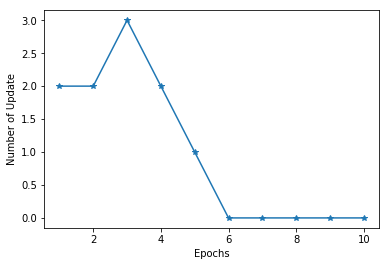

In [21]:
#クラス"Perceptron"を定義しておく
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        #np.zerosでゼロのリストを生成
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            #zip関数でイテレータを生成
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#試行回数毎に更新状況を追跡
ppn = Perceptron(eta = 0.1, n_iter=10)

ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='*')

plt.xlabel("Epochs")
plt.ylabel("Number of Update")

plt.show()

#パーセプトロンは6回目のエポックで収束していることがわかる